In [11]:
import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w):
    f = w[1]*x + w[0]
    return f

def loss_MAE(f,y):
    loss = np.sum(np.abs(y-f)) / np.size(f)
    return loss

def grad_MAE(w, x, y):
    x1 = np.vstack((np.ones_like(x), x))
    f = w.dot(x1)
    e = (y-f)
    grad = -(1.0/len(x)) * x.dot((np.sign(e).T))
    return grad, f

Text(0, 0.5, 'f(x)')

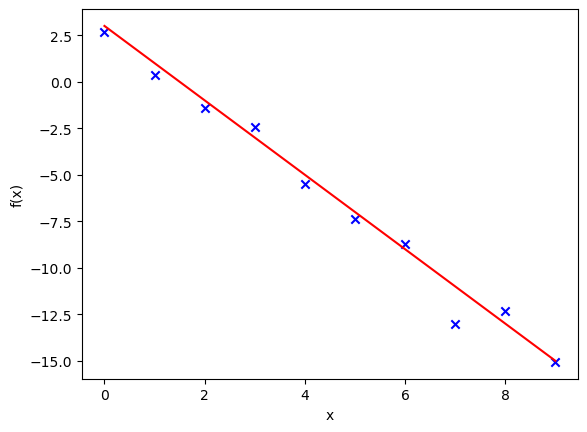

In [12]:
# Cooking up data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
w_ideal = np.array([3, -2])
y = w_ideal[1]*x + w_ideal[0] + 0.9*np.random.randn(np.size(x))

w = w_ideal
f = model_linear(x,w)

# Plotting data
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="r")
plt.xlabel("x")
plt.ylabel("f(x)")

100000
[ 5.52875 -2.37125]


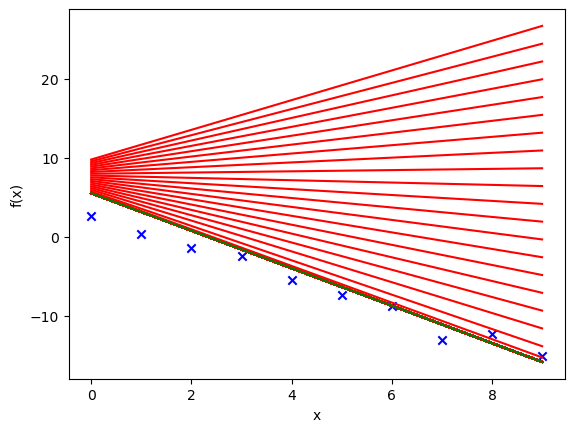

In [13]:
# Gradient Descent Algorithm with MAE

# Initialization
w = np.array([10, 2.1])
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 100000
iterations = 1

while True:
    grad, f = grad_MAE(w, x, y)
    w_new = w - learning_rate*grad
    
    #Stopping Conditions
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations >= max_iter:
        break
        
    if iterations % (max_iter/1000) == 0:
        # Plot the line
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        
    iterations +=1
    w = w_new
    
# Plot the Best Fit Line
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="g")

print(iterations)
print(w)

Text(0, 0.5, 'f(x)')

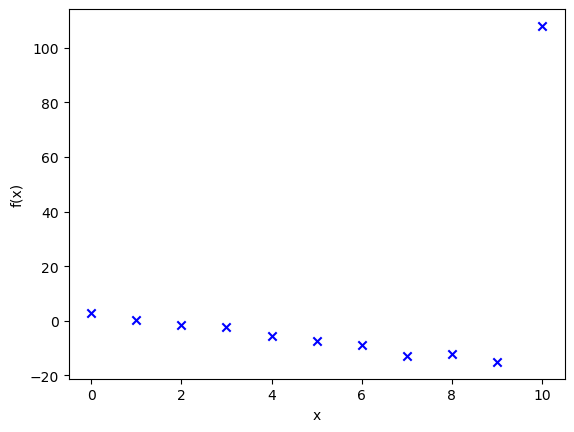

In [14]:
# EFFECT OF OUTLIERS

# Add an outlier
x = np.append(x,[10])
y = np.append(y,[108])

# Plotting the data
plt.scatter(x, y, c="b", marker='x')
plt.xlabel("x")
plt.ylabel("f(x)")

100000
[ 5.52913636 -2.37086364]


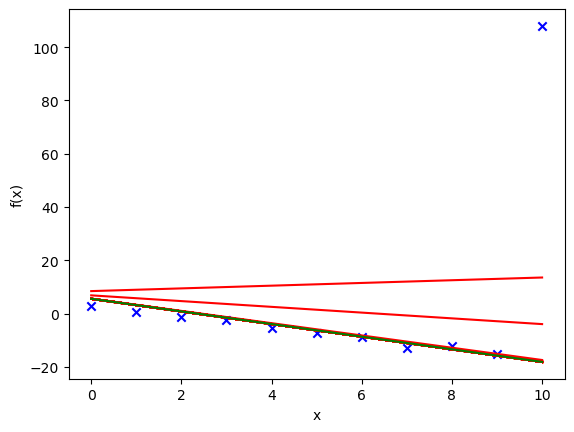

In [15]:
# Gradient Descent Algorithm with Outliers

# Initialization
w = np.array([10, 2.1])
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 100000
iterations = 1

while True:
    grad, f = grad_MAE(w, x, y)
    w_new = w - learning_rate*grad
    
    #Stopping Conditions
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations >= max_iter:
        break
        
    if iterations % (max_iter/100) == 0:
        # Plot the line
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        
    iterations +=1
    w = w_new
    
# Plot the Best Fit Line
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="g")

print(iterations)
print(w)